In [ ]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# Naive solution 



In [ ]:
def naive_prime_factorization(n):

    factors = []

    if n == 2:
        factors.append(2)
        return factors

    for i in range(2, n):
        if n % i == 0:
            factors.append(i)
            n = n / i
            if n == 1:
                break

    return factors

def FindGCD1(m, n):

    # Step 1&2: Find the prime factors of m and n
    factors_m = naive_prime_factorization(m)
    factors_n = naive_prime_factorization(n)

    # Step 3: Find all the common prime factors
    common_factors = []
    for i in factors_m:
        if i in factors_n:
            common_factors.append(i)

    # Step 4: Step 4 Compute the product of all the common prime factors and return it as gcd(m,n)
    product = 1
    for i in common_factors:
        product *= i

    return product

# Sieve of Eratosthenes

In [42]:
def sieve_of_eratosthenes_prime_finder(n):

    sieve = [True] * (n + 1) # Create a sive of Eratosthenes of size n+1

    # First prime number is 2
    p = 2
    while p * p <= n:

        # If sieve[p] is not changed, then it is a prime
        if sieve[p]:

            # Update all multiples of p
            for i in range(p * p, n + 1, p):
                sieve[i] = False # i is not a prime

        p += 1

    # Return a list of prime numbers
    primes = []
    for p in range(2, n + 1):
        if sieve[p]:
            primes.append(p)

    return primes

def sieve_of_eratosthenes_prime_factorization(n):

    # Step 1: Find all the prime numbers less than or equal to n
    primes = sieve_of_eratosthenes_prime_finder(n)

    # Step 2: Find all the prime factors of n
    factors = []
    for i in primes:
        while n % i == 0:
            factors.append(i)
            n //= i

    return factors

def FindGCD2(m, n):

     # Step 1&2: Find the prime factors of m and n
    factors_m = sieve_of_eratosthenes_prime_factorization(m)
    factors_n = sieve_of_eratosthenes_prime_factorization(n)

    print(f"Prime factors of {m} are {factors_m}")
    print(f"Prime factors of {n} are {factors_n}")

    # Step 3: Find all the common prime factors
    common_factors = []
    for i in factors_m:
        if i in factors_n:
            common_factors.append(i)

    # Step 4 Compute the product of all the common prime factors and return it as gcd(m,n)
    gcd = 1
    for i in common_factors:
        gcd *= i

    return gcd




# Recursive GCD

In [ ]:
def FindGCD3(m, n):

    if m == 0 and n == 0: return 0
    if m == 0: return n
    if n == 0: return m
    if m == n: return m
    
    if m > n: 
         return FindGCD3(m % n, n)
    
    return FindGCD3(m, n % m)

# The moment of truth

In [ ]:
m, n = map(int, input().split(", "))

m = abs(m)
n = abs(n)

if m == 0 or n == 0:
    print("GCD of 0 and 0 is not defined")
else:
    start_time = time.time()
    gcd_1 = FindGCD1(m, n)
    end_time = time.time()
    print(f"GCD of {m} and {n} is {gcd_1}, time taken: {end_time - start_time} seconds")

    start_time = time.time()
    gcd_2 = FindGCD2(m, n)
    end_time = time.time()
    print(f"GCD of {m} and {n} is {gcd_2}, time taken: {end_time - start_time} seconds")

    start_time = time.time()
    gcd_3 = FindGCD3(m, n)
    end_time = time.time()
    print(f"GCD of {m} and {n} is {gcd_3}, time taken: {end_time - start_time} seconds")


In [43]:
# Read input from file 

file = open("Example_LAB_1.txt", "r")

with open("Example_LAB_1.txt", "r") as file:
    data = file.readlines()

    for line in data:
        m, n = map(int, line.split(", "))
        print(m, n)

        start_time = time.time()
        gcd_1 = FindGCD1(m, n)
        end_time = time.time()
        print(f"GCD of {m} and {n} is {gcd_1}, time taken: {end_time - start_time} seconds")

        start_time = time.time()
        gcd_2 = FindGCD2(m, n)
        end_time = time.time()
        print(f"GCD of {m} and {n} is {gcd_2}, time taken: {end_time - start_time} seconds")

        start_time = time.time()
        gcd_3 = FindGCD3(m, n)
        end_time = time.time()
        print(f"GCD of {m} and {n} is {gcd_3}, time taken: {end_time - start_time} seconds")



111 234
GCD of 111 and 234 is 3, time taken: 2.9802322387695312e-05 seconds
Prime factors of 111 are [3, 37]
Prime factors of 234 are [2, 3, 3, 13]
GCD of 111 and 234 is 3, time taken: 6.198883056640625e-05 seconds
GCD of 111 and 234 is 3, time taken: 1.6689300537109375e-06 seconds
60 225
GCD of 60 and 225 is 15, time taken: 8.821487426757812e-06 seconds
Prime factors of 60 are [2, 2, 3, 5]
Prime factors of 225 are [3, 3, 5, 5]
GCD of 60 and 225 is 15, time taken: 3.790855407714844e-05 seconds
GCD of 60 and 225 is 15, time taken: 2.1457672119140625e-06 seconds


# Performance Testing

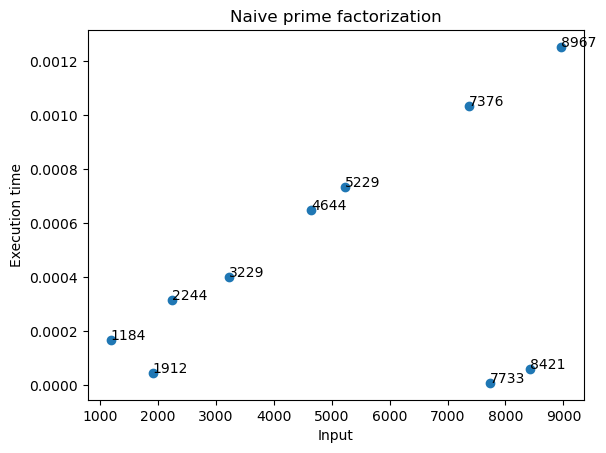

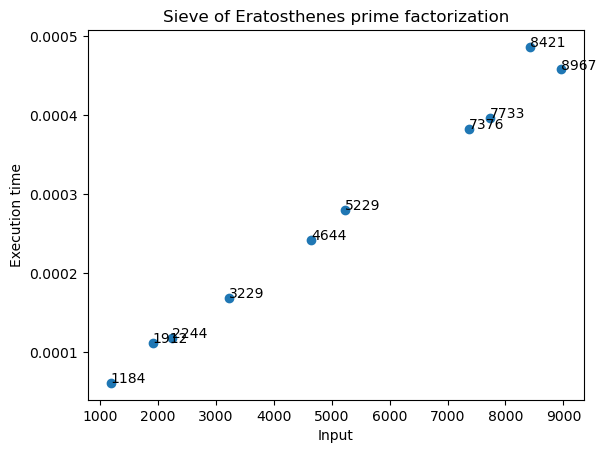

In [44]:
# Random 10 numbers
numbers = np.random.randint(10, 10000, 10)

# Performance testing 
def execute_pf_navie(number):

    execution_time = np.array([])

    for n in numbers:
        start_time = time.time()
        naive_prime_factorization(n)
        end_time = time.time()

        execution_time = np.append(execution_time, end_time - start_time)

    x_axis = numbers
    y_axis = execution_time

    # Plot the execution time
    fig, ax = plt.subplots()
    ax.scatter(x_axis, y_axis)

    for i in range(len(x_axis)):
        ax.annotate(x_axis[i], (x_axis[i], y_axis[i]))
    plt.ylabel('Execution time')
    plt.xlabel('Input')
    plt.title('Naive prime factorization')
    plt.show()

def execute_pf_sieve(number):

    execution_time = np.array([])

    for n in numbers:
        start_time = time.time()
        sieve_of_eratosthenes_prime_factorization(n)
        end_time = time.time()

        execution_time = np.append(execution_time, end_time - start_time)

    x_axis = numbers
    y_axis = execution_time

    # Plot the execution time

    fig, ax = plt.subplots()
    ax.scatter(x_axis, y_axis)

    for i in range(len(x_axis)):
        ax.annotate(x_axis[i], (x_axis[i], y_axis[i]))
    
    plt.ylabel('Execution time')
    plt.xlabel('Input')
    plt.title('Sieve of Eratosthenes prime factorization')
    plt.show()

execute_pf_navie(numbers)
execute_pf_sieve(numbers)